#### By
#### Bernardo Vimpi 
###### July 2020


### PROJECT SCCOPE

In this project we use Linear Regression Model to evaluate the Survival of the Titanic. We use the Titanic data set from Kaggle. Not, we decided to use only a portion of the data set: the train data. We used the train data and then split it into train and Test. For an entire evaluation of the Titanic Data Set, one can use the entire data set (both Train and Test). 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


### DATA IMPORT

In [30]:
train= pd.read_csv('titanic_train.csv')

In [31]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### EXPLORATORY DATA ANALYSIS

In [32]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


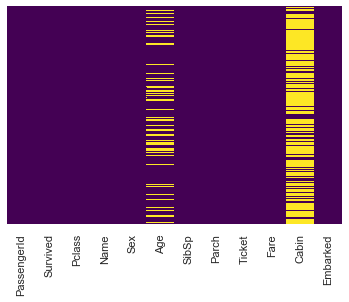

In [33]:
sns.heatmap(train.isnull(), yticklabels =False, cbar=False, cmap='viridis')

We created the heatmap for the bulean values (True False). Every yello dash in the above heatmap represents a true point where True it was null. 

In [34]:
sns.set_style('whitegrid')

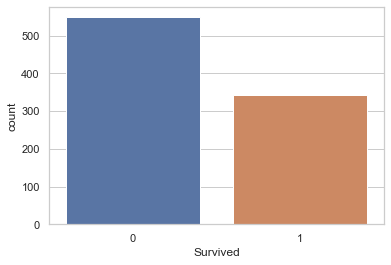

In [35]:
sns.countplot(x='Survived', data=train)

around 550 did not survive while around 350 did survive

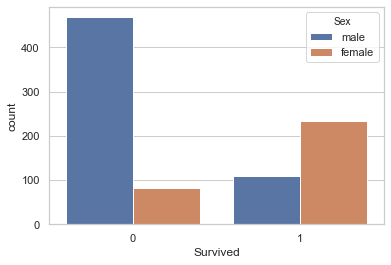

In [36]:
sns.countplot(x='Survived', hue='Sex', data=train)# to count the survivals by sex.

people who didn't survive were most likely to be male while those who survived were most likely to be female.

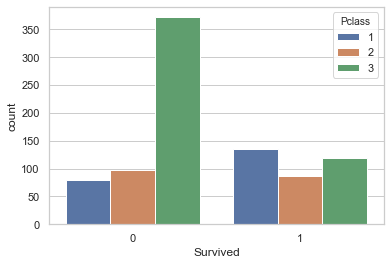

In [37]:
sns.countplot(x='Survived', hue='Pclass', data=train)# to count the survival by the class they belonged to.

The data here shows that people who didn't survive were most likely part of the lower class (3), while those who survived were part of the higher classes (1 and 2).

###### Lets look at the Age distribution of the Titanic Passangers

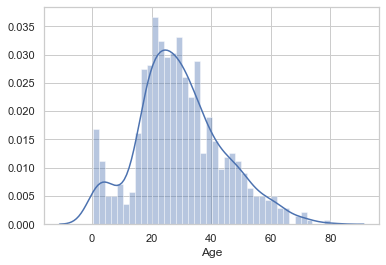

In [38]:
sns.distplot(train['Age'].dropna(), kde=True, bins =40)

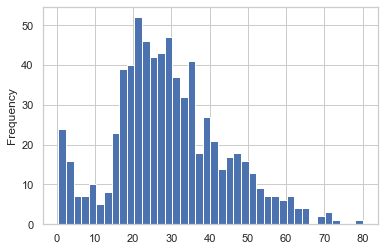

In [39]:
train['Age'].plot.hist(bins =40)# to plot the distribution for the Age column. 

We have a bi-module we have passangers of ages 0 to 10 and after that we can see the average age around 20s or 30s. 

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


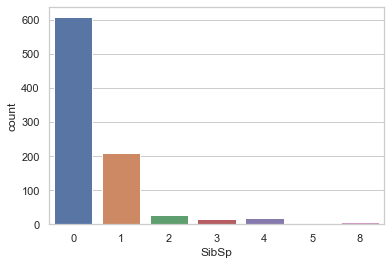

In [41]:
sns.countplot(x='SibSp', data=train)# to evaluate the Siblink column

Most people didn't have children or spouce on board

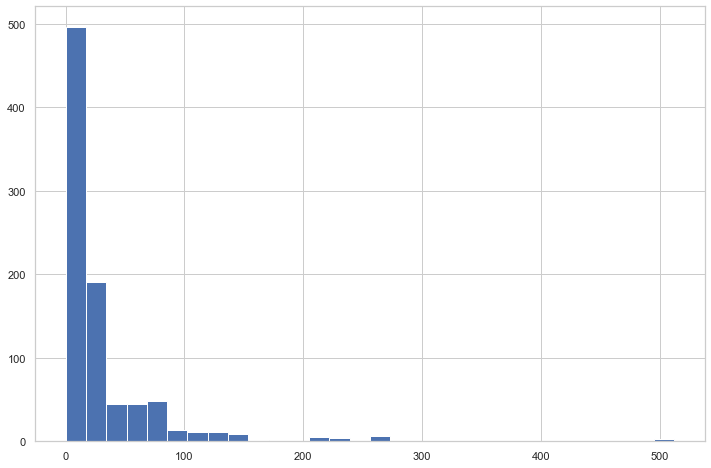

In [42]:
train['Fare'].hist(bins= 30, figsize= (12,8))# for the price they paid

most distribution seems to be between 0 and 100.

## DATA CLEANING

We want to fill in the missing data of the age column instead of just dropping the entire column off which in this case would have a trememndous negative effect on our analysis. Instead, we'll this by filling in the mean age of all the passengers( a method called imputation). We can also improve our analysis of this by checking the mean age by passenger class, for instance. 

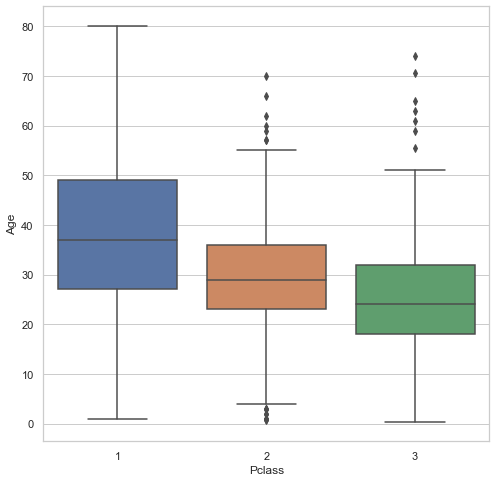

In [43]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Pclass', y='Age', data=train)


when we separete by class, the wealthier passengers (in the first and second classes) tend to be relatively older than the passengers in the 3rd class. We can use this as base to calculate and get the mean age of passengers in each of these classes.

In [44]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
            return Age

In [45]:
train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)

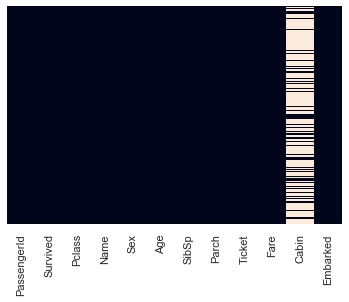

In [46]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

Now we don't have any missing information for the "Age" column. However, the "Cabin" column seems to be another issue here since we have too many missing points. We could create a binary for the Cabin column with "Yes" and "No". However, since there is so much missing information, we can go ahead and drop te Cabin column

##### DROPPING THE CABIN COLUMN and another columns

In [47]:
train.drop('Cabin', axis=1, inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The Canin column is dropped now.

In [49]:
train.dropna(inplace=True)

## CATEGORICAL FEATURES CONVERSION to DUMMY VARIABLE

We Need to convert categorical features into dummy variables using pandas. This is because a machine learning algorythm won't be able to directly take those features as inputs. 

In [50]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


The above data frame can create a multicolinearity issue. Meaning that one column, female, is a perfect predictor of the other column, male. This means that if the machine learning algorythm gets fed both columns, it will immediately know that if it is 0.00 in female it can predict perferctly that it will be a male. This is a multicolinearity issue since it will mess up the algorythm because a group of columns will be perfect predictors of another column. We can improve our code as below.

In [51]:
pd.get_dummies(train['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


The above dataframe is what we want to feed in in the machine learning algorythm as a column. 

In [57]:
sex = pd.get_dummies(train['Sex'], drop_first=True)# using the above code and atributing it to another date frame "Sex"

In [53]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [54]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


###### USING CONTACTINATION TO ADD THE NEW COLUMNS TO THE DATA FRAME

In [58]:
train= pd.concat([train, sex, embark], axis=1)

In [59]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1


Now we have the new columns Male, Q and S which are the replacing columns and indicators or dummy variables. This means we don't need the Embarked column because its already in the Q and S and we don't need the Sex column because its already in the Male column. The other columns such as Ticket and Name we are not going to use them. We can go ahead and drop them since we are not going to use them. 

In [60]:
train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [61]:
train.head(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1


We now have all numercal data, everything is concatinated together and the columns are working well. Lets now look at the first numerical column "PassangerId".

In [62]:
train.tail(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


The Passenger column is indexed and that can bee seen via its numerical attributes. Since there is no much information for us to gain from it, we'll go ahead and drop it. 

In [63]:
train.drop('PassengerId', axis=1, inplace=True)

In [64]:
train.head(4)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1


Notice that the Pclass column is a categorical column and can have only the values of 1,2 and 3. That means we could also have done pd.get_dummies on that column. But we'll leave it for now( this is typically not recommended, but for exercising purposes, we'll leave it alone) 

## DATA SPLIT TEST AND TRAIN

Note: Here we are using the above train data set as if it was all our data. In real life situation, we'll have two data sets: Train and Test. For this exercise, we are using the above Train data set to split our data into Test and Test. Thus we are treating our train data set as if it were the entire data set available to us. In real life we do the cleaning for both Train and Test data before feeding it to a machine learning algorythm. 

In [71]:
X= train.drop('Survived', axis=1)
y= train['Survived']# this is what we are trying to predict.

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### MODEL CREATION AND PREDICTION

###### Let us import Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logmodel = LogisticRegression()# This is our Logist Regression Model

#### TRAINNING THE MODEL

In [77]:
logmodel.fit(X_train, y_train)

C:\Users\bev\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### CALL FOR PREDICTIONS USING THE X_Test Data Set

In [82]:
predictions= logmodel.predict(X_test)

We now have Created the model, Fit the Model and Predict the Model. Now lets evaluate our Model. 

# MODEL EVALUATION

##### USING CLASSIFICATION REPORTS

In [83]:
from sklearn.metrics import classification_report

The classification report will give us information on the Precision, Accuracy, Recall values, F-1 Score and more.

In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



###### USING CONFUSION METRIX

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

### Thank you!

##### Bernardo Vimpi
###### July 2020